<a href="https://colab.research.google.com/github/SaudAltamimi/Koalas_tutorial/blob/master/koalas_session_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is _Apache Spark_?




<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Apache_Spark_logo.svg/1200px-Apache_Spark_logo.svg.png width="200">

> **_Apache Spark_** is a unified computing engine and a set of libraries for parallel data processing on [computer clusters](https://en.wikipedia.org/wiki/Computer_cluster).

> Spark is the most actively developed open source engine for this task, making it a standard tool for any developer or data scientist interested in big data. 

> Spark supports multiple widely used programming languages (Python, Java, Scala, and R), includes libraries for diverse tasks ranging from SQL to streaming and machine learning, and runs anywhere from a laptop to a cluster of thousands of servers. 

> This makes it an easy system to start with and scale-up to **big data processing** or incredibly large scale.

`Chambers, Bill; Zaharia, Matei. Spark: The Definitive Guide: Big Data Processing Made Simple. O'Reilly Media.`

## What is [_Koalas_](https://koalas.readthedocs.io/en/latest/)?


<img src=https://raw.githubusercontent.com/databricks/koalas/master/icons/koalas-logo.png width="200">





**pandas API on Apache Spark**

The Koalas project makes data scientists & data engineers more productive when interacting with big data, by implementing the pandas DataFrame API on top of Apache Spark. **pandas** is the de facto standard (***single-node***) DataFrame implementation in Python, while **Spark** is the de facto standard for *big data processing*. With this package, you can:

> Be immediately productive with Spark, with no learning curve, if you are already familiar with pandas.

> Have a single codebase that works both with pandas (tests, smaller datasets) and with Spark (distributed datasets).

[Reducing Time-To-Insight for Virgin Hyperloop’s Data](https://koalas.readthedocs.io/en/latest/getting_started/videos_blogs.html#webinar-databricks-mar-27-2020)

<img src=https://databricks.com/wp-content/uploads/2019/08/koalas-image4.png width="700">

## Installations

> First We need to install Java

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
!pip install pyspark
!pip install koalas

     |████████████████████████████████| 218.4MB 60kB/s 
     |████████████████████████████████| 204kB 41.7MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.6-py2.py3-none-any.whl size=218814406 sha256=def1c49040ddafdc0b736c87bdcec87b8015e9887c4352e9b1b46f066b20ed80
  Stored in directory: /root/.cache/pip/wheels/1e/5e/6a/17e906c94ec7246f260330a66e44a06a0809033ba2738a74a8
Successfully built pyspark
     |████████████████████████████████| 972kB 2.8MB/s 


In [ ]:
import pandas as pd 
import databricks.koalas as ks
%matplotlib inline 

In [ ]:
# if we check the sparkcontex? 
# Main entry point for Spark functionality. 
# A SparkContext represents the connection to a Spark cluster.

from pyspark import SparkContext

sc = SparkContext.getOrCreate()
sc

<SparkContext master=local[*] appName=pyspark-shell>

## Objectives

You will learn:

* Data Analysis using _koalas_. 
* Create transformations. 
* Aggregations.
* Visualize results.
* Pipelines.

## Dataset: Stanford Open Policing Project

> https://openpolicing.stanford.edu/



*   **_stop_date_**: The date of the stop, in YYYY-MM-DD format.
*   **_stop_time_**: The 24-hour time of the stop, in HH:MM format.
*   **_county_name_**: County name where provided.
*   **_driver_gender_**: The recorded gender of the stopped driver.
*   **_driver_age_raw_**: The year of driver birthdate.
*   **_driver_age_**: The age of the stopped driver.
*   **_driver_race_**: 	The race of the stopped driver. Values are standardized to white, black, hispanic, asian/pacific islander, and other/unknown.
*   **_violation_raw_**: Specific violation of stop where provided. What is recorded here varies widely across police departments.
*   **_violation_**: Violations of stop where provided (standardized).
*   **_search_conducted_**: Indicates whether any type of search was conducted, i.e. driver, passenger, vehicle. 
*   **_search_type_**: The type of the search if it was conducted.



> This Exercise inspired by a brilliant talk that was given by the great explainer **Kevin Makham** [pandas best practices](https://www.youtube.com/watch?v=hl-TGI4550M&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=2&t=4s), I would really encourage to follow his talk if you feel you are not comfortable enough with pandas library, and by using this notebook, you will learn both **Pandas** & **Koalas**.


In [ ]:
# read the file
path_to_file = 'police.csv'
pdf = pd.read_csv(path_to_file)
kdf = ks.read_csv(path_to_file)

In [ ]:
display(pdf.head(2))
display(kdf.head(2))

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,None,M,1985.0,20.0,White,Speeding,Speeding,False,None,Citation,False,0-15 Min,False
1,2005-01-18,08:15,None,M,1965.0,40.0,White,Speeding,Speeding,False,None,Citation,False,0-15 Min,False


In [ ]:
# Number of rows and columns?
print(pdf.shape)
print(kdf.shape)

(91741, 15)
(91741, 15)


In [ ]:
# dtypes?
kdf.dtypes

stop_date             datetime64[ns]
stop_time                     object
county_name                   object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
dtype: object

In [ ]:
# adding columns?
ks.to_datetime(kdf.stop_date.dt.date.astype(str) + ' ' + kdf.stop_time).head()

0   2005-01-02 01:55:00
1   2005-01-18 08:15:00
2   2005-01-23 23:15:00
3   2005-02-20 17:15:00
4   2005-03-14 10:00:00
Name: stop_date, dtype: datetime64[ns]

In [ ]:
#nulls?
kdf.isna().mean().nlargest(3)

county_name    1.000000
search_type    0.965163
driver_age     0.061270
Name: 0, dtype: float64

## Data Analysis

### 1. Remove the column that only contains missing values 

In [ ]:
kdf = kdf.drop(columns=['county_name'])

In [ ]:
kdf.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

### 2. Do men or women speed more often?

In [ ]:
kdf.violation.value_counts()

Speeding               48463
Moving violation       16224
Equipment              11020
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: violation, dtype: int64

In [ ]:
# when someone is stopped for speeding, how often is it a man or woman?
kdf[kdf.driver_gender == 'M'].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [ ]:
kdf[kdf.driver_gender == 'F'].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [ ]:
# when a man is pulled over, how often is it for speeding?


In [ ]:
# repeat for women


### 3. Does gender affect who gets searched during a stop? 

In [ ]:
#ignore gender for the moment
#using pandas


In [ ]:
#using koalas
#for females
kdf[kdf.driver_gender == 'F'].search_conducted.value_counts(normalize=True)

False    0.979967
True     0.020033
Name: search_conducted, dtype: float64

In [ ]:
# search rate by gender
kdf[kdf.driver_gender == 'M'].search_conducted.value_counts(normalize=True)

False    0.956674
True     0.043326
Name: search_conducted, dtype: float64

### 5. During a search, how often is the driver frisked? 

In [ ]:
# (hint: search_type column)
# there is a problem in this column !! ? 

kdf.search_type.str.contains('Protective Frisk').mean()*100

8.573216520650814

### 6. Which year had the least number of stops?

In [ ]:
kdf.stop_date.dt.year.value_counts().nsmallest(1)

2005    2558
Name: stop_date, dtype: int64

### 7. Do most stops occur at night?

In [ ]:
kdf.stop_time.head()

0    01:55
1    08:15
2    23:15
3    17:15
4    10:00
Name: stop_time, dtype: object

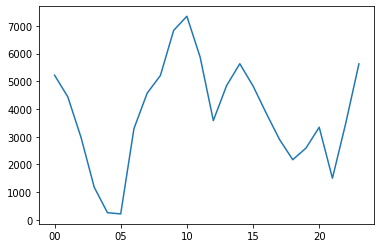

In [ ]:
(kdf
 .stop_time
 .apply(lambda string: string.split(':')[0])
 .value_counts()
 .sort_index()
 .plot()
 )

### 9. Pretend you don't have the driver_age column, and create it from driver_age_raw (and call it new_age)

In [ ]:
import datetime as dt

kdf['new_age'] = dt.datetime.now().year - kdf['driver_age_raw']
kdf[['new_age','driver_age_raw']].head()

,new_age,driver_age_raw
0,35.0,1985.0
1,55.0,1965.0
2,48.0,1972.0
3,34.0,1986.0
4,36.0,1984.0


### 10. How does drug activity change by time of day? 

In [ ]:
kdf.drugs_related_stop.mean()

0.008883705213590434

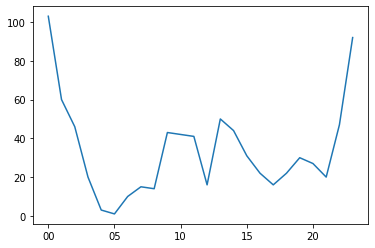

In [ ]:
#(hint: group by hours)
(kdf[kdf.drugs_related_stop == True]
 .stop_time
 .apply(lambda string: string.split(':')[0])
 .value_counts()
 .sort_index()
 .plot()
 )

## Bonus: pipelines

The ability to write data science code or data transformation pipelines that are easy to understand by others is a great skill to have. Orgnizing your transformation steps using the `pipe` method will help you learn this easily & intuitivly.

> Inspired by the amazing ***Vincent D. Warmerdam*** and his talk [Untitled12.ipynb](https://www.youtube.com/watch?v=yXGCKqo5cEY&t=685s)

> If you feel that you need to optimize one of the function by interacting  directly with `pyspark`, you can simply use (`spark_df = kdf.to_spark()`) and write your code, then finally return the results as a Koalas dataframe (`return ks.DataFrame(spark_df)`).

> Type hints is crucial for Koalas performance, check [here](https://koalas.readthedocs.io/en/latest/user_guide/typehints.html#type-hints-in-koalas)

In [ ]:
def start_pipeline(df):
  return df.copy()

def correct_time(df):
  df['stop_datetime'] = kpd.to_datetime(df.stop_date + ' ' + df.stop_time)
  df.drop(columns = ['stop_time','stop_date'],inplace=True)
  return df

def add_features(df):
  df.to_spark()
  # code 

  return df


(kdf
 .pipe(start_pipeline)
 .pipe(correct_time)
 .pipe(add_features)
 .head()
 )

,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime
0,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-02 01:55:00
1,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-18 08:15:00
2,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-23 23:15:00
3,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005-02-20 17:15:00
4,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-03-14 10:00:00


## Bonus: SQL API

In [ ]:
ks.sql('SELECT year(stop_date) year, count(*) cnt FROM {kdf} GROUP BY 1 ORDER BY 2 DESC LIMIT 5')

,year,cnt
0,2012,10970
1,2006,10639
2,2007,9476
3,2014,9228
4,2008,8752
